You are hired by a venture capitalist to predict the profit of a startup. Fo that you have to deal with a dataset which contains the details of 50 startup’s and predicts the profit of a new Startup based on certain features. Based on your decision and prediction, whether one should invest in a particular startup or not.

Dataset contains the following fields: 
R&D Stend - Total amount of money spent on Research and Development Administration - Total amount of money spent on Administration 
Marketing Spend - Total amount of money spent on Markeing 
State - The state where the startup operates 
Profit - Profit earned by startup

You have to perform following task before applying machine learning algorithms: 
1) Handle missing values 
2) Prepare data for training and testing
3) Apply Decision Tree algorithm to train the model
4) Apply Random Forest Regressor algorithm to train the model
5) Compare the accuracy with Linear Regression too.

In [249]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sb

In [250]:
#loading data file
data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [251]:
#displays number of columns and records/rows in dataset
#check if there is any missing data or not
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [252]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

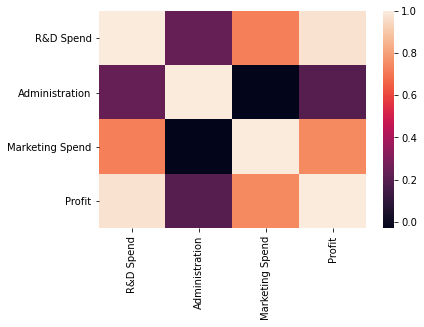

In [253]:
sb.heatmap(data.corr())

In [254]:
# The heatmap shows that R&D spend and profit has a covarience of 1 but since profit is our
# dependent variable so we cannot remove the column

<AxesSubplot:ylabel='R&D Spend'>

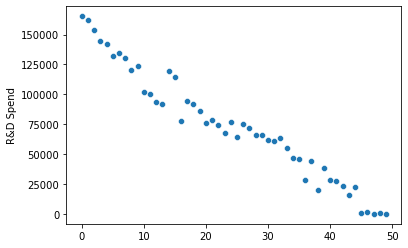

In [255]:
sb.scatterplot(data=data['R&D Spend'])

In [256]:
#There are no outliers in the R&D.

<AxesSubplot:ylabel='Marketing Spend'>

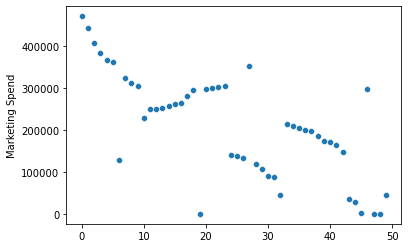

In [257]:
sb.scatterplot(data=data['Marketing Spend'])

<AxesSubplot:ylabel='State'>

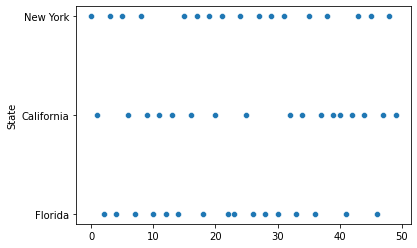

In [258]:
sb.scatterplot(data=data['State'])

In [259]:
# this is the plot shows the frequency of startups in different cities.

<AxesSubplot:ylabel='Administration'>

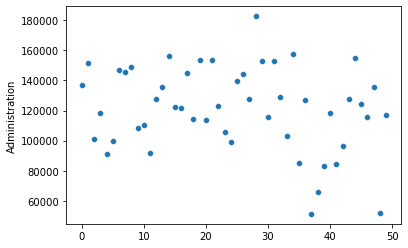

In [260]:
sb.scatterplot(data=data['Administration'])

In [261]:
# This is the scatter plot of administration of startup.

In [262]:
features = data.iloc[:,:4].values
label = data.iloc[:,-1].values

In [263]:
features

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [264]:
#convert the categorical features to numerical features 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
        ("OneHot",        
         OneHotEncoder(), 
         [3]              
         )
    ],
    remainder='passthrough'
)
features = transformer.fit_transform(features.tolist())
features 

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [0.0, 1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [1.0, 0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [0.0, 1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [265]:
#converting an object to normal array
features = features.astype(float)

In [266]:
features

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [267]:
#spliiting our data into test and train sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=42)


In [268]:
#Creating our model using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)


In [269]:
# predicting the result.
df = pd.DataFrame({'real_value': y_test, 'pred_value': y_pred})
print(df)

   real_value     pred_value
0   134307.35  126362.879083
1    81005.76   84608.453836
2    99937.59   99677.494252
3    64926.08   46357.460686
4   125370.37  128750.482885
5    35673.41   50912.417419
6   105733.54  109741.350327
7   107404.34  100643.242816
8    97427.84   97599.275746
9   122776.86  113097.425244


In [270]:
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

0.9537019995248526
0.898726641431929


In [271]:
#Creating our model using Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor


bestVariance = -1
testscore = 10
for depth in range(1,10,2):
    DTR = DecisionTreeRegressor(max_depth=depth)
    DTR.fit(X_train,y_train)
    testscore = DTR.score(X_test,y_test)
    if  testscore > bestVariance:
        best_regressor = DTR
        bestvariance = testscore
        y_predi = DTR.predict(X_test)

decisionTreeRegressor = best_regressor

In [272]:
# predicting the result.
df = pd.DataFrame({'real_value': y_test, 'pred_value': y_predi})
print(df)

   real_value  pred_value
0   134307.35   141585.52
1    81005.76    78239.91
2    99937.59    97483.56
3    64926.08    49490.75
4   125370.37   124266.90
5    35673.41    42559.73
6   105733.54   108552.04
7   107404.34   101004.64
8    97427.84   101004.64
9   122776.86   146121.95


In [273]:
#checking score of training as well as testing
print(decisionTreeRegressor.score(X_train,y_train))
print(decisionTreeRegressor.score(X_test,y_test))

1.0
0.8814239768105763


In [274]:

from sklearn.ensemble import RandomForestRegressor
bestvariance = -1
# trainscore = 100
# testscore = 100
# scorevariance = 100
for i in range(4,10):
    RF=RandomForestRegressor(n_estimators=i)
    RF.fit(X_train,y_train)
#     trainscore = RF.score(X_train,y_train)
    testscore = RF.score(X_test,y_test)
#     scorevariance = abs(trainscore - testscore)
    if testscore > bestvariance:
        best_regressor = RF
        bestvariance = testscore
        y_predic = RF.predict(X_test)
    
rfregressor = best_regressor

In [275]:
# predicting the result.
df = pd.DataFrame({'real_value': y_test, 'pred_value': y_predic})
print(df)

   real_value     pred_value
0   134307.35  124483.910000
1    81005.76   84246.263333
2    99937.59  101181.658333
3    64926.08   47180.410000
4   125370.37  127779.676667
5    35673.41   35577.293333
6   105733.54  108603.538333
7   107404.34  100969.816667
8    97427.84   99623.723333
9   122776.86  122341.145000


In [276]:
s = rfregressor.score(X_test,y_test)
s

0.9402410705247045

In [277]:
result= {'Linear Regression':[regressor.score(X_test,y_test)] , 'Decision Tree Regression':[decisionTreeRegressor.score(X_test,y_test)],'Random Forest Regression':[rfregressor.score(X_test,y_test)] }
df = pd.DataFrame(data=result, index=["Test score"])
df

,Linear Regression,Decision Tree Regression,Random Forest Regression
Test score,0.898727,0.881424,0.940241


In [245]:
# from the test scores of the three models, Random forest regression has the best test score. So Random Forest regression is 
#the most efficient model